# Overview

This notebook illustrates how to analyze `.csv` files, such as those output by `xcms`, in R.

# Goals

- gain familiarity with R (and by extension, xcms) syntax
- learn common manipulations e.g. reading, sorting, filtering, reshaping, writing) for "spreadsheet"-like data
- gain familiarity with popular R data analysis packages
- learn the benefits of separating data and code


# Requirements

* R installation
* Jupyter and IRkernel installation (if using .ipynb format, otherwise you can use the R script generated from the .ipynb file)
* various Hadleyverse packages.

In [1]:
require(tidyr)
require(dplyr)
require(ggplot2)

Loading required package: tidyr
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggplot2


In [2]:
# load the data

df <- read.csv(file='../data/xcms_csv_file.csv', 
               header=T,
               sep=","
              )

In [3]:
# examine what happened: looking at the top of a data frame

head(df, 7)

name,fold,tstat,pvalue,anova,mzmed,mzmin,mzmax,rtmed,rtmin,...,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48
M149T457,1.683336,40.68827,1.465319e-10,1.026619e-13,149.04739,149.04126,149.09473,457.1322,399.8631,...,119717.13,116559.74,125774.57,115475.96,124351.89,117713.88,117376.80,116750.60,113122.93,116428.17
M123T1009,2.317781,-47.88949,2.254852e-09,8.700272e-31,122.96381,122.96304,122.96419,1008.5092,1007.5589,...,176689.67,171624.44,160527.26,157190.71,166012.36,143816.42,148906.88,143170.49,136763.43,141756.39
M82T1009,2.206251,-31.12848,3.358481e-09,2.334652e-28,81.93766,81.93725,81.93794,1008.5885,1007.1439,...,61486.16,56933.63,55744.20,55661.00,56773.75,51473.18,49951.96,51578.12,45247.40,48676.27
M148T942,1.914024,-25.88802,8.777663e-09,3.232485e-07,147.93052,147.92965,147.93088,942.0330,940.4022,...,870338.89,808480.51,762791.20,710628.36,772109.27,736376.52,775569.49,697432.13,700053.90,688924.69
M187T1010,2.251078,-30.10986,1.292954e-08,8.305063e-22,186.95634,186.95524,186.95684,1009.8465,1007.8777,...,77444.65,74613.87,73557.50,71240.15,74552.29,58260.79,63862.70,57779.47,57047.74,62491.78
M493T838,1.633436,36.06549,3.664084e-07,1.411105e-27,493.31116,493.30672,493.31641,838.4489,836.4669,...,80862.74,81080.20,78960.16,77544.38,77658.99,78867.24,78593.90,79101.87,79988.66,78410.30
M83T181,3.194076,13.31652,9.721265e-07,1.063821e-07,83.08400,83.08263,83.08442,180.5859,179.9819,...,18688.94,17282.60,35570.89,20485.46,11010.97,27306.89,28350.60,31563.87,32285.64,27426.01


In [4]:
# the pipe operator

df %>% head(7)

name,fold,tstat,pvalue,anova,mzmed,mzmin,mzmax,rtmed,rtmin,...,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48
M149T457,1.683336,40.68827,1.465319e-10,1.026619e-13,149.04739,149.04126,149.09473,457.1322,399.8631,...,119717.13,116559.74,125774.57,115475.96,124351.89,117713.88,117376.80,116750.60,113122.93,116428.17
M123T1009,2.317781,-47.88949,2.254852e-09,8.700272e-31,122.96381,122.96304,122.96419,1008.5092,1007.5589,...,176689.67,171624.44,160527.26,157190.71,166012.36,143816.42,148906.88,143170.49,136763.43,141756.39
M82T1009,2.206251,-31.12848,3.358481e-09,2.334652e-28,81.93766,81.93725,81.93794,1008.5885,1007.1439,...,61486.16,56933.63,55744.20,55661.00,56773.75,51473.18,49951.96,51578.12,45247.40,48676.27
M148T942,1.914024,-25.88802,8.777663e-09,3.232485e-07,147.93052,147.92965,147.93088,942.0330,940.4022,...,870338.89,808480.51,762791.20,710628.36,772109.27,736376.52,775569.49,697432.13,700053.90,688924.69
M187T1010,2.251078,-30.10986,1.292954e-08,8.305063e-22,186.95634,186.95524,186.95684,1009.8465,1007.8777,...,77444.65,74613.87,73557.50,71240.15,74552.29,58260.79,63862.70,57779.47,57047.74,62491.78
M493T838,1.633436,36.06549,3.664084e-07,1.411105e-27,493.31116,493.30672,493.31641,838.4489,836.4669,...,80862.74,81080.20,78960.16,77544.38,77658.99,78867.24,78593.90,79101.87,79988.66,78410.30
M83T181,3.194076,13.31652,9.721265e-07,1.063821e-07,83.08400,83.08263,83.08442,180.5859,179.9819,...,18688.94,17282.60,35570.89,20485.46,11010.97,27306.89,28350.60,31563.87,32285.64,27426.01


In [5]:
# the core dplyr verbs: arrange, filter, select, mutate

df %>% 
    filter(rtmed < 900 & rtmed > 200) %>%
    arrange(anova) %>%
    head


name,fold,tstat,pvalue,anova,mzmed,mzmin,mzmax,rtmed,rtmin,...,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48
M493T838,1.633436,36.06549,3.664084e-07,1.411105e-27,493.3112,493.3067,493.3164,838.4489,836.4669,...,80862.74,81080.20,78960.16,77544.38,77658.99,78867.24,78593.90,79101.87,79988.66,78410.30
M537T837,1.930036,19.45066,2.567546e-05,2.302916e-26,537.3375,537.3252,537.3457,836.7892,835.0042,...,68223.18,69716.79,69553.25,68891.26,67670.81,70023.85,68330.25,68620.75,68561.64,68851.71
M411T851,2.490395,13.56048,5.301075e-05,6.893949e-26,411.0935,411.0900,411.0958,850.6648,848.8855,...,296863.35,295900.67,306255.66,307024.25,318682.93,289580.25,308339.30,296833.27,295602.35,310472.67
M581T835,1.934450,13.61848,4.514626e-05,5.356814e-25,581.3634,581.3590,581.3657,835.2554,833.2352,...,44959.26,46865.18,47281.90,45730.34,47136.18,46081.47,46184.90,47146.97,48540.76,48471.79
M412T851,2.518805,13.58499,2.094835e-05,5.921362e-25,412.0936,412.0913,412.0960,850.9949,849.6856,...,105212.17,108158.08,111815.96,108778.91,116692.46,102197.37,109922.95,104669.85,108382.50,112880.82
M311T888,1.562050,-10.95732,8.986526e-06,3.330628e-21,311.2555,311.2549,311.2569,888.2458,886.8282,...,186773.26,182070.68,184546.28,176659.44,180239.53,178261.27,177433.06,177708.57,156652.34,157602.10


In [6]:
# get your data to a long format

names(df)

data.cols <- names(df) %in% c('X01', 'X48') %>% which

data.cols

long.df <- 
    df %>%
        gather(sample, area, data.cols[1]:data.cols[2])

[1] "name"     "fold"     "tstat"    "pvalue"   "anova"    "mzmed"   
 [7] "mzmin"    "mzmax"    "rtmed"    "rtmin"    "rtmax"    "npeaks"  
[13] "wt.0"     "X2157.0"  "wt.3"     "X2157.3"  "wt.6"     "X2157.6" 
[19] "wt.12"    "X2157.12" "wt.24"    "X2157.24" "X01"      "X02"     
[25] "X03"      "X04"      "X05"      "X06"      "X07"      "X08"     
[31] "X09"      "X10"      "X11"      "X12"      "X13"      "X14"     
[37] "X15"      "X16"      "X17"      "X18"      "X19"      "X20"     
[43] "X21"      "X22"      "X23"      "X24"      "X25"      "X26"     
[49] "X27"      "X28"      "X29"      "X30"      "X31"      "X32"     
[55] "X33"      "X34"      "X35"      "X36"      "X37"      "X38"     
[61] "X39"      "X40"      "X41"      "X42"      "X43"      "X44"     
[67] "X45"      "X46"      "X47"      "X48"

[1] 23 70

In [7]:
long.df %>% 
    head

long.df %>% 
    select(name, anova, mzmed, rtmed, sample, area) %>%
    head

name,fold,tstat,pvalue,anova,mzmed,mzmin,mzmax,rtmed,rtmin,...,wt.3,X2157.3,wt.6,X2157.6,wt.12,X2157.12,wt.24,X2157.24,sample,area
M149T457,1.683336,40.68827,1.465319e-10,1.026619e-13,149.04739,149.04126,149.09473,457.1322,399.8631,...,5,3,5,1,3,5,4,5,X01,70559.47
M123T1009,2.317781,-47.88949,2.254852e-09,8.700272e-31,122.96381,122.96304,122.96419,1008.5092,1007.5589,...,5,3,5,5,5,5,5,5,X01,332881.28
M82T1009,2.206251,-31.12848,3.358481e-09,2.334652e-28,81.93766,81.93725,81.93794,1008.5885,1007.1439,...,5,3,5,5,5,5,5,5,X01,106851.00
M148T942,1.914024,-25.88802,8.777663e-09,3.232485e-07,147.93052,147.92965,147.93088,942.0330,940.4022,...,4,3,4,5,3,5,4,4,X01,1361183.99
M187T1010,2.251078,-30.10986,1.292954e-08,8.305063e-22,186.95634,186.95524,186.95684,1009.8465,1007.8777,...,5,3,5,5,5,5,5,5,X01,138703.04
M493T838,1.633436,36.06549,3.664084e-07,1.411105e-27,493.31116,493.30672,493.31641,838.4489,836.4669,...,5,3,5,5,5,5,5,5,X01,50542.06


name,anova,mzmed,rtmed,sample,area
M149T457,1.026619e-13,149.04739,457.1322,X01,70559.47
M123T1009,8.700272e-31,122.96381,1008.5092,X01,332881.28
M82T1009,2.334652e-28,81.93766,1008.5885,X01,106851.00
M148T942,3.232485e-07,147.93052,942.0330,X01,1361183.99
M187T1010,8.305063e-22,186.95634,1009.8465,X01,138703.04
M493T838,1.411105e-27,493.31116,838.4489,X01,50542.06


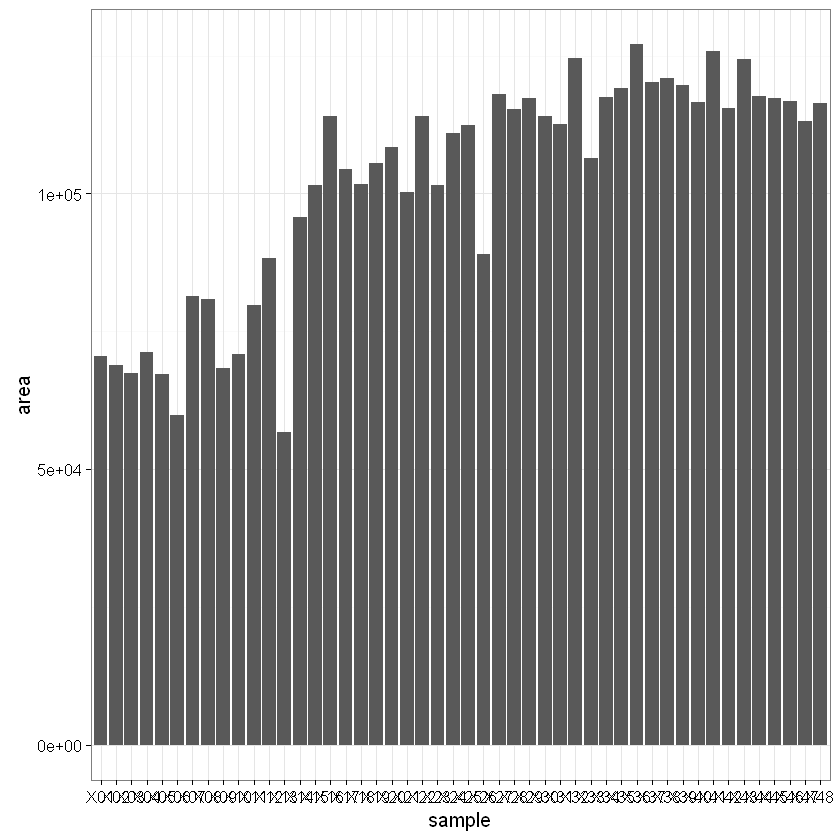

In [8]:
long.df %>%
    filter(name == 'M149T457') %>%
    ggplot(aes(x = sample, y = area)) +
        geom_bar(stat='identity') +
        theme_bw()

In [9]:
# attach some class info from a different file

class.info <- read.csv('../data/class_info_csv_file.csv',
                       header = T,
                       sep = ',')

class.info %>% head

sample_id,animal,colonization,time_hr
1,wt1,wt,0
2,wt2,wt,0
3,wt3,wt,0
4,wt4,wt,0
5,wt5,wt,0
6,del1,2157,0


In [13]:
long.df <- 
    long.df %>%
        mutate(sample = gsub('[^0-9]', '', sample) %>% as.numeric) 

In [14]:
merged.df <- 
    long.df %>%
        left_join(class.info, by = c('sample' = 'sample_id'))

merged.df %>% head

name,fold,tstat,pvalue,anova,mzmed,mzmin,mzmax,rtmed,rtmin,...,X2157.6,wt.12,X2157.12,wt.24,X2157.24,sample,area,animal,colonization,time_hr
M149T457,1.683336,40.68827,1.465319e-10,1.026619e-13,149.04739,149.04126,149.09473,457.1322,399.8631,...,1,3,5,4,5,1,70559.47,wt1,wt,0
M123T1009,2.317781,-47.88949,2.254852e-09,8.700272e-31,122.96381,122.96304,122.96419,1008.5092,1007.5589,...,5,5,5,5,5,1,332881.28,wt1,wt,0
M82T1009,2.206251,-31.12848,3.358481e-09,2.334652e-28,81.93766,81.93725,81.93794,1008.5885,1007.1439,...,5,5,5,5,5,1,106851.00,wt1,wt,0
M148T942,1.914024,-25.88802,8.777663e-09,3.232485e-07,147.93052,147.92965,147.93088,942.0330,940.4022,...,5,3,5,4,4,1,1361183.99,wt1,wt,0
M187T1010,2.251078,-30.10986,1.292954e-08,8.305063e-22,186.95634,186.95524,186.95684,1009.8465,1007.8777,...,5,5,5,5,5,1,138703.04,wt1,wt,0
M493T838,1.633436,36.06549,3.664084e-07,1.411105e-27,493.31116,493.30672,493.31641,838.4489,836.4669,...,5,5,5,5,5,1,50542.06,wt1,wt,0


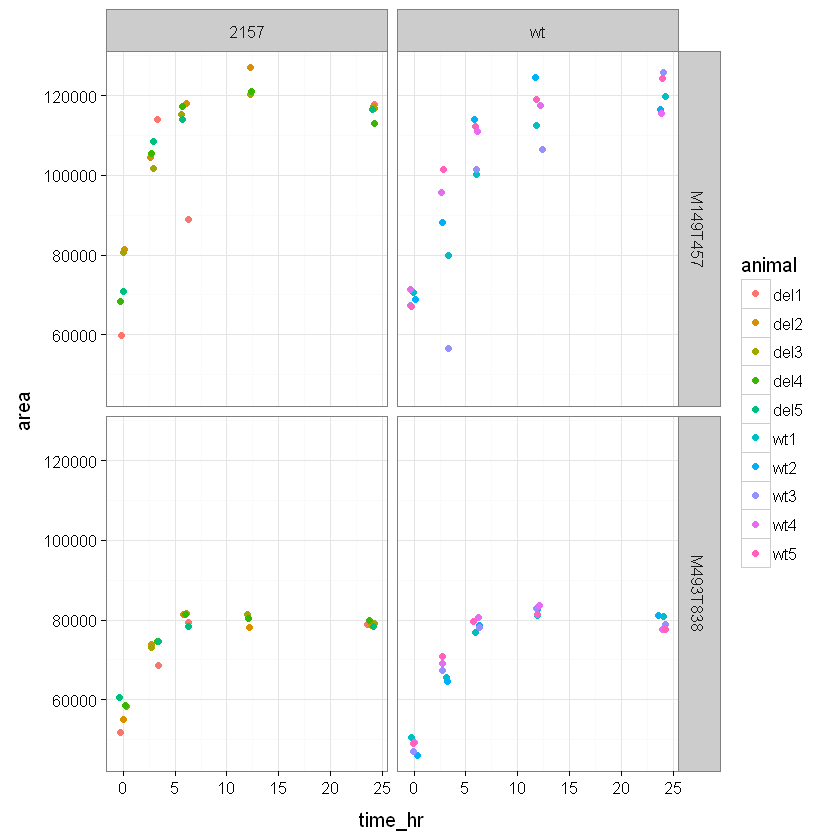

In [38]:
merged.df %>%
    filter(name == c('M149T457', 'M493T838')) %>%  # two random features
    ggplot(aes(x = time_hr, y = area, color = animal)) +
        facet_grid(name~colonization) +
        geom_jitter(width = 1) +
        theme_bw()


Warning message in sqrt(x):
"NaNs produced"Warning message:
"Removed 655 rows containing missing values (geom_point)."

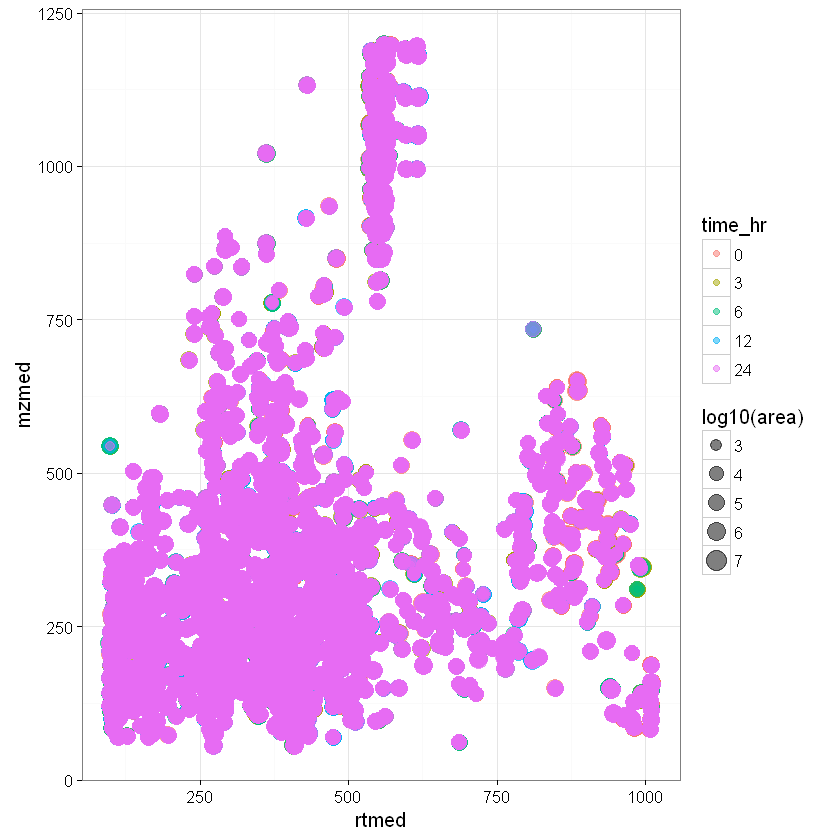

In [61]:
merged.df %>%
    mutate(time_hr = time_hr %>% as.factor) %>%
    ggplot(aes(x = rtmed, y = mzmed, size = log10(area), color = time_hr)) +
        geom_point(alpha = 0.5) +
        theme_bw() +
        scale_size_continuous()


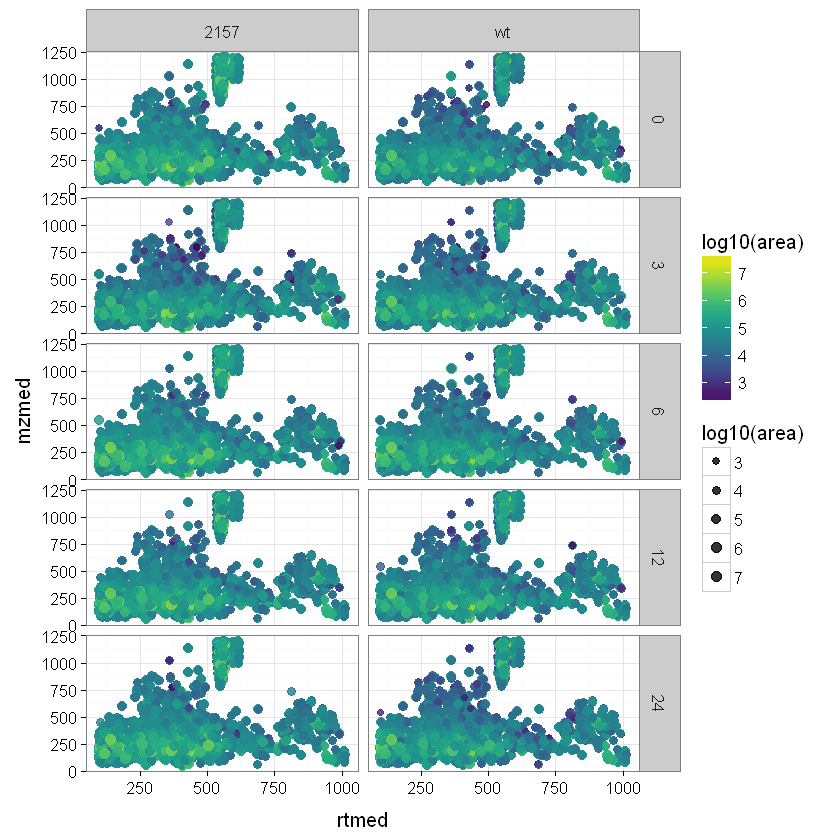

In [50]:
require(viridis)
merged.df %>%
    mutate(time_hr = time_hr %>% as.factor) %>%
    ggplot(aes(x = rtmed, y = mzmed, size = log10(area), color = log10(area))) +
        facet_grid(time_hr~colonization) +
        geom_point(alpha = 0.8) +
        theme_bw() +
        scale_color_viridis() +
        scale_size_area(max_size = 3)


In [49]:
?scale_size_continuous

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


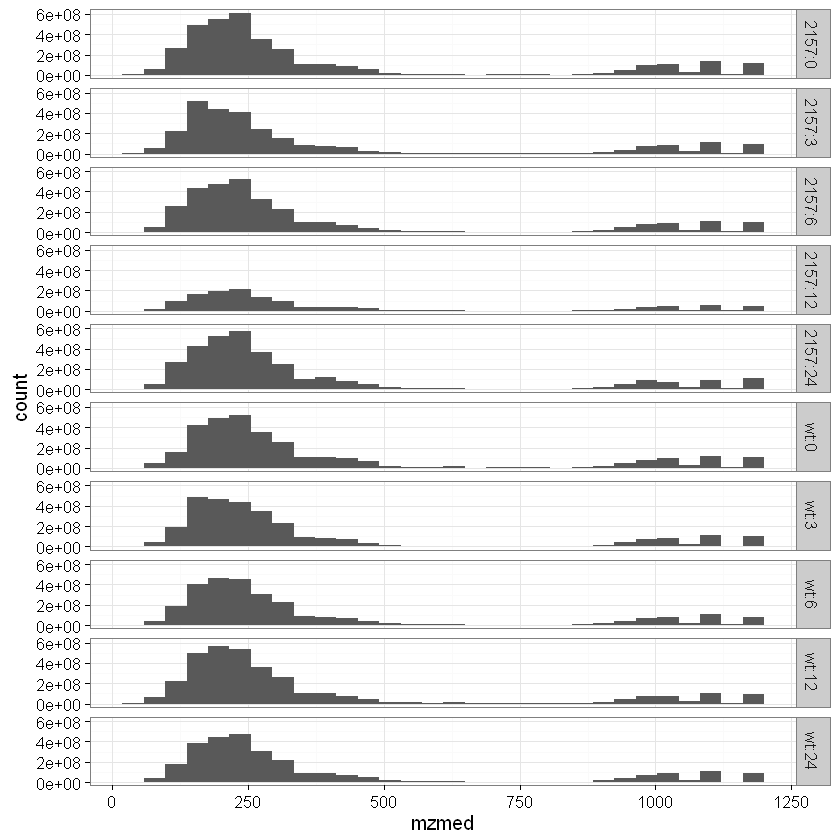

In [59]:
merged.df %>%
    mutate(class = as.factor(colonization):as.factor(time_hr)) %>%
    ggplot(aes(x = mzmed, weights = area)) +
        geom_histogram() +
        facet_grid(class ~ .) +
        theme_bw()